# Tugas EDA & Klasifikasi Kelompok 5_C2

FIKRY IDHAM DWIYANA (2101294)

RATU SYAHIRAH KHAIRUNNISA (2200978)

ADRIAN MULIANTO (2200939)

TALITHA FAYARINA ADHIGUNAWAN (2201271)

WILDAN HAFIZH RAFFIANSHAR (2202301)

## Study Case : Non Performing Loan

Datanya adalah NPL (Non Performing Loan) untuk mendeteksi nasabah yang kreditnya akan macet (gagal bayar). Field yang menjadi kelas yang harus diprediksi adalah  "flag_kredit_macet". 

### Penjelasan Atribut

'X': kolom indeks.

'jumlah_kartu': Jumlah total kartu kredit atau pinjaman yang dimiliki oleh individu.

'outstanding': Jumlah utang atau saldo yang belum dibayar pada semua kartu kredit yang dimiliki oleh individu.

'limit_kredit': Menunjukkan batas kredit maksimum yang dimiliki.

'tagihan': Jumlah tagihan total pada semua kartu kredit.

'total_pemakaian_tunai': Menunjukkan total uang tunai yang ditarik atau diambil oleh pemegang kartu kredit.

'total_pemakaian_retail': Merujuk pada total pembelian barang atau jasa dengan kartu kredit selain uang tunai.

'sisa_tagihan_tidak_terbayar': Jumlah yang masih harus dibayar pada tagihan kartu kredit.

'kode_cabang': Kode yang mengidentifikasi cabang pemmberi kredit.

'rasio_pembayaran': Merupakan perbandingan antara pembayaran yang dibuat terhadap tagihan atau utang tertentu.

'persentasi_overlimit': Menunjukkan sejauh mana pemegang kartu kredit melampaui batas kredit mereka.

'rasio_pembayaran_3bulan': Rasio pembayaran selama 3 bulan terakhir.

'rasio_pembayaran_6bulan': Rasio pembayaran selama 6 bulan terakhir.

'skor_delikuensi': Menunjukan berapa kali pengguna melanggar ketentuan dari prmberi kredit.

'flag_kredit_macet': indikator apakah kredit tersebut dianggap akan macet (terlambat atau gagal bayar).

'jumlah_tahun_sejak_pembukaan_kredit': Merupakan jumlah tahun sejak pembukaan kartu kredit atau pinjaman.

'total_pemakaian': Adalah jumlah total pemakaian kredit, termasuk uang tunai dan pembelian retail.

'sisa_tagihan_per_jumlah_kartu': Sisa tagihan per jumlah kartu kredit yang dimiliki.

'sisa_tagihan_per_limit': Rasio sisa tagihan per batas kredit.

'total_pemakaian_per_limit': Rasio total pemakaian per batas kredit.

'pemakaian_3bln_per_limit': Rasio pemakaian selama 3 bulan terakhir per batas kredit.

'pemakaian_6bln_per_limit': Rasio pemakaian selama 6 bulan terakhir per batas kredit.

'utilisasi_3bulan': Utilisasi kredit selama 3 bulan terakhir, yaitu rasio pemakaian terhadap batas kredit.

'utilisasi_6bulan': Utilisasi kredit selama 6 bulan terakhir, yaitu rasio pemakaian terhadap batas kredit.

### Import library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Explorasi Data

### Membaca Data Train

In [2]:
train = pd.read_csv("npl_train.txt")

### Copy Data Original

Membuat salinan data sehingga meskipun harus membuat perubahan apa pun pada data set ini, tidak akan kehilangan data asli

In [3]:
train_original = train.copy()

### Melihat isi data

In [4]:
train.head(10)

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,...,0,15.416667,94.0,13161.50,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.00,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.00,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,...,0,19.750000,2536660.0,145333.50,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.50,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571
5,6,2,6227439,80000000.0,2081248.0,0.0,3690250.0,4613435.0,A,0.00,...,0,10.250000,3690250.0,2306717.50,0.057668,0.046128,0.017184,0.117513,0.038964,0.181863
6,7,2,3906290,4000000.0,2043682.0,0.0,230400.0,3314046.0,A,18.47,...,0,4.666667,230400.0,1657023.00,0.828511,0.057600,0.018750,0.166667,1.014776,0.977231
7,8,4,9534837,20000000.0,3692028.0,0.0,9327612.0,7881069.0,A,58.55,...,0,0.750000,9327612.0,1970267.25,0.394053,0.466381,0.239289,0.241599,0.261753,0.224026
8,9,2,4145065,5000000.0,4021399.0,0.0,335680.0,4122425.0,B,15.24,...,0,5.666667,335680.0,2061212.50,0.824485,0.067136,0.196042,0.000000,0.470024,0.000000
9,10,4,1818606,7000000.0,1765911.0,0.0,0.0,1627786.0,A,100.00,...,0,8.500000,0.0,406946.50,0.232541,0.000000,0.075000,0.094801,0.315145,0.626448


In [5]:
train.tail()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
15488,15489,2,20743090,20000000.0,20527879.0,0.0,295000.0,14769911.0,A,0.0,...,0,1.00,295000.0,7384956.0,0.7380,0.014700,0.0581,0.0262,1.0200,1.010
15489,15490,2,3855317,17000000.0,3160704.0,0.0,269998.0,0.0,A,100.0,...,0,9.33,269998.0,0.0,0.0000,0.015900,0.1370,0.0737,0.2110,0.160
15490,15491,2,62162,6000000.0,41120.0,0.0,238.0,0.0,A,100.0,...,0,2.00,238.0,0.0,0.0000,0.000040,0.0000,0.3360,0.0104,0.113
15491,15492,3,264597,4000000.0,252864.0,0.0,1018.0,246512.0,I,102.0,...,0,3.83,1018.0,82171.0,0.0616,0.000255,0.0000,0.2680,0.3270,0.647
15492,15493,2,4067271,5000000.0,3939921.0,0.0,0.0,4062413.0,F,95.7,...,0,2.25,0.0,2031207.0,0.8120,0.000000,0.2500,0.3330,1.0600,1.050


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X                                    15493 non-null  int64  
 1   jumlah_kartu                         15493 non-null  int64  
 2   outstanding                          15493 non-null  int64  
 3   limit_kredit                         15493 non-null  float64
 4   tagihan                              15493 non-null  float64
 5   total_pemakaian_tunai                15493 non-null  float64
 6   total_pemakaian_retail               15493 non-null  float64
 7   sisa_tagihan_tidak_terbayar          15493 non-null  float64
 8   kode_cabang                          15393 non-null  object 
 9   rasio_pembayaran                     15493 non-null  float64
 10  persentasi_overlimit                 15493 non-null  float64
 11  rasio_pembayaran_3bulan     

In [7]:
train.columns

Index(['X', 'jumlah_kartu', 'outstanding', 'limit_kredit', 'tagihan',
       'total_pemakaian_tunai', 'total_pemakaian_retail',
       'sisa_tagihan_tidak_terbayar', 'kode_cabang', 'rasio_pembayaran',
       'persentasi_overlimit', 'rasio_pembayaran_3bulan',
       'rasio_pembayaran_6bulan', 'skor_delikuensi', 'flag_kredit_macet',
       'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian',
       'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit',
       'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit',
       'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan'],
      dtype='object')

In [8]:
train.shape

(15493, 24)

### Target Variable

target pada data set ini adalah flag_kredit_macet

In [9]:
print(train["flag_kredit_macet"].count())
train["flag_kredit_macet"].value_counts()

15493


0    14134
1     1359
Name: flag_kredit_macet, dtype: int64

In [10]:
print(train["skor_delikuensi"].count())
train["skor_delikuensi"].value_counts()

15493


0    15451
1       29
2        4
4        4
5        3
3        2
Name: skor_delikuensi, dtype: int64

### Menghitung Jumlah Setiap Nilai dalam Kolom "flag_kredit_macet"

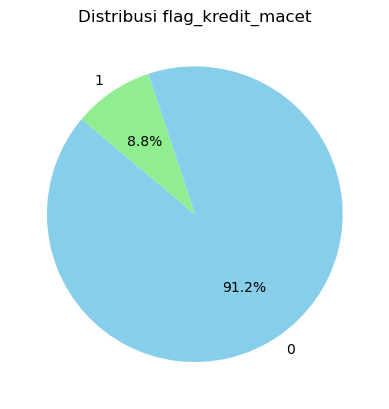

In [11]:
# Menghitung jumlah setiap nilai dalam kolom "flag_kredit_macet"
flag_kredit_macet_counts = train['flag_kredit_macet'].value_counts()

# Membuat pie chart
plt.pie(flag_kredit_macet_counts, labels=flag_kredit_macet_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribusi flag_kredit_macet')
plt.show()

In [12]:
print(train["rasio_pembayaran"].count())
train["rasio_pembayaran"].value_counts()

15493


0.00      4740
100.00    4017
10.00      207
101.00     196
99.90      107
          ... 
30.49        1
182.91       1
13.12        1
30.67        1
150.00       1
Name: rasio_pembayaran, Length: 1665, dtype: int64

In [13]:
print(train["skor_delikuensi"].count())
train["skor_delikuensi"].value_counts()

15493


0    15451
1       29
2        4
4        4
5        3
3        2
Name: skor_delikuensi, dtype: int64

In [14]:
print(train["limit_kredit"].count())
train["limit_kredit"].value_counts()

15493


3000000.0      2183
5000000.0      2131
7000000.0      1118
10000000.0      959
20000000.0      949
               ... 
195000000.0       1
205000000.0       1
133000000.0       1
9500000.0         1
106000000.0       1
Name: limit_kredit, Length: 150, dtype: int64

In [15]:
print(train["utilisasi_3bulan"].count())
train["utilisasi_3bulan"].value_counts()

15493


1.030000    158
1.010000    158
1.020000    155
1.060000    146
1.070000    137
           ... 
0.797700      1
0.052578      1
0.024588      1
0.277459      1
0.055600      1
Name: utilisasi_3bulan, Length: 4094, dtype: int64

### Menampilkan Data yang memiliki NaN

In [16]:
# Menampilkan data yang memiliki NaN
result_nan = train[train['kode_cabang'].isna()]

#result_nan
sorted_data_nan = result_nan.sort_values(by='limit_kredit', ascending=False)
sorted_data_nan

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
14615,14616,2,48201900,100000000.0,38470769.0,0.0,12600000.0,40446335.0,NaN,0.0,...,0,4.58,12600000.0,20223168.0,0.4040,0.12600,0.12000,0.04550,0.2580,0.201
7440,7441,6,41331234,100000000.0,21000000.0,0.0,53000000.0,0.0,NaN,236.0,...,0,5.58,53000000.0,0.0,0.0000,0.53000,0.26700,0.38600,0.4550,0.475
3338,3339,5,81501285,100000000.0,12438988.0,0.0,6189000.0,70519310.0,NaN,100.0,...,0,8.58,6189000.0,14103862.0,0.7050,0.06190,0.00597,0.00174,0.7780,0.807
6442,6443,7,37922655,99000000.0,8283601.0,0.0,14154763.0,0.0,NaN,100.0,...,0,6.67,14154763.0,0.0,0.0000,0.14300,0.25900,0.30300,0.3340,0.170
4112,4113,6,35113217,93000000.0,3146111.0,0.0,5882907.0,0.0,NaN,100.0,...,0,5.25,5882907.0,0.0,0.0000,0.06330,0.07610,0.14600,0.4910,0.134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7759,7760,2,2937936,3000000.0,3116935.0,0.0,50000.0,2558147.0,NaN,19.4,...,0,1.67,50000.0,1279074.0,0.8530,0.01670,0.25900,0.12300,0.5700,0.362
8294,8295,4,3053352,3000000.0,3162419.0,0.0,229800.0,3136960.0,NaN,0.0,...,0,4.92,229800.0,784240.0,1.0500,0.07660,0.29500,0.38900,0.9400,0.516
9030,9031,2,138616,3000000.0,99963.0,0.0,0.0,87661.0,NaN,100.0,...,0,4.75,0.0,43831.0,0.0292,0.00000,0.05320,0.29100,0.0143,0.455
9087,9088,2,2316350,3000000.0,3239830.0,0.0,12000.0,2288782.0,NaN,0.0,...,0,7.17,12000.0,1144391.0,0.7630,0.00400,0.46200,0.54400,1.3600,1.540


### Menampilkan Baris dengan "kode_cabang" A

In [17]:
# Menampilkan baris dengan 'kode_cabang' sama dengan 'A'
result = train[train['kode_cabang'] == 'A']

sorted_data = result.sort_values(by='limit_kredit', ascending=False)
sorted_data

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
13235,13236,5,443768160,1.000000e+09,628000000.0,0.0,100000.0,223000000.0,A,0.0,...,1,7.170000,100000.0,44579953.0,0.223000,0.0001,0.127000,0.498000,0.548000,0.327000
9596,9597,7,631055450,1.000000e+09,186000000.0,0.0,32169795.0,0.0,A,100.0,...,1,12.800000,32169795.0,0.0,0.000000,0.0322,0.172000,0.857000,0.576000,0.341000
8210,8211,4,798058574,5.000000e+08,382000000.0,0.0,32169795.0,444000000.0,A,0.0,...,1,12.000000,32169795.0,111000000.0,0.888000,0.0643,0.255000,0.429000,1.100000,0.681000
12303,12304,7,631055450,3.500000e+08,419000000.0,28733412.0,285000000.0,443000000.0,A,61.2,...,0,5.500000,314000000.0,63237084.0,1.260000,0.8960,0.218000,0.156000,1.650000,0.478000
7000,7001,5,443768160,3.500000e+08,419000000.0,0.0,32169795.0,444000000.0,A,22.8,...,0,9.170000,32169795.0,88753632.0,1.270000,0.0919,0.364000,0.092700,1.650000,0.485000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,12974,2,2569033,3.000000e+06,2178300.0,0.0,1027858.0,2561138.0,A,50.6,...,0,7.670000,1027858.0,1280569.0,0.854000,0.3430,0.348000,0.104000,0.760000,1.080000
5824,5825,2,1942881,3.000000e+06,1884207.0,0.0,0.0,2000000.0,A,10.0,...,0,4.420000,0.0,997711.0,0.665000,0.0000,0.228000,0.161000,0.595000,0.152000
849,850,2,1927073,3.000000e+06,1472140.0,0.0,0.0,1934158.0,A,100.0,...,0,4.500000,0.0,967079.0,0.644719,0.0000,0.287583,0.363026,0.526927,0.200441
856,857,2,2443664,3.000000e+06,648793.0,0.0,0.0,2369761.0,A,100.0,...,0,0.833333,0.0,1184880.5,0.789920,0.0000,0.266583,0.062133,0.842992,0.067017


### Menampilkan Rata-rata Limit Kredit per Kode Cabang

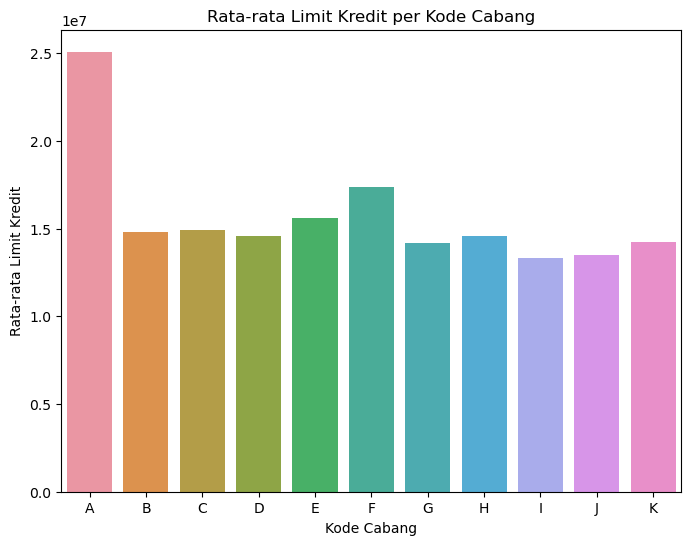

In [18]:
# Mengelompokkan berdasarkan 'kode_cabang' dan menghitung rata-rata limit kredit
rata_rata_limit = train.groupby('kode_cabang')['limit_kredit'].mean().reset_index()

# Membuat plot batang dari rata-rata limit kredit
plt.figure(figsize=(8, 6))
sns.barplot(data=rata_rata_limit, x='kode_cabang', y='limit_kredit')
plt.title('Rata-rata Limit Kredit per Kode Cabang')
plt.xlabel('Kode Cabang')
plt.ylabel('Rata-rata Limit Kredit')
plt.show()

Plot ini menunjukan rata-rata limit kredit per kode cabang dan rata-rata limit yang paling tinggi adalah kode cabang A.

In [19]:
result.shape

(8705, 24)

### Menampilkan Frekuensi Kode Cabang

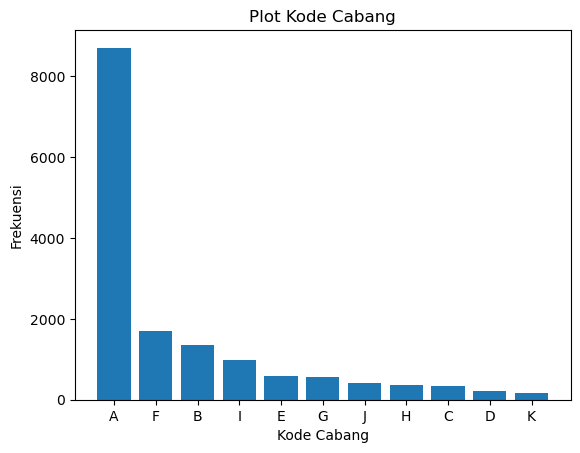

In [20]:
# Menghitung frekuensi masing-masing kode cabang
kode_cabang_counts = train['kode_cabang'].value_counts()

# Membuat plot batang dari frekuensi kode cabang dengan data NaN
plt.bar(kode_cabang_counts.index, kode_cabang_counts)
plt.title('Plot Kode Cabang')
plt.xlabel('Kode Cabang')
plt.ylabel('Frekuensi')
plt.show()

Plot ini menunjukan frekuensi kode cabang dan kode cabang A memiliki frekuensi paling besar.

In [21]:
train['kode_cabang'].unique()

array(['I', 'A', 'G', 'B', 'E', 'K', 'F', 'C', 'J', 'H', nan, 'D'],
      dtype=object)

### Menampilkan Perbandingan Rata-rata Limit Kredit berdasarkan Kode Cabang

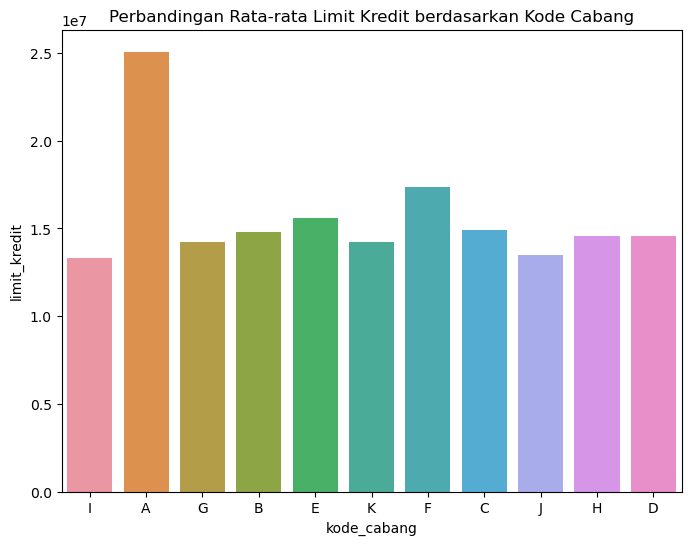

In [22]:
# Buat bar plot rata-rata limit kredit berdasarkan kode cabang
plt.figure(figsize=(8, 6))
sns.barplot(x='kode_cabang', y='limit_kredit', data=train, ci=None)
plt.title('Perbandingan Rata-rata Limit Kredit berdasarkan Kode Cabang')
plt.show()

Plot tersebut menunjukkan perbandingan rata-rata limit kredit berdasarkan kode cabang.

### Heatmap Hubungan Antar Kolom

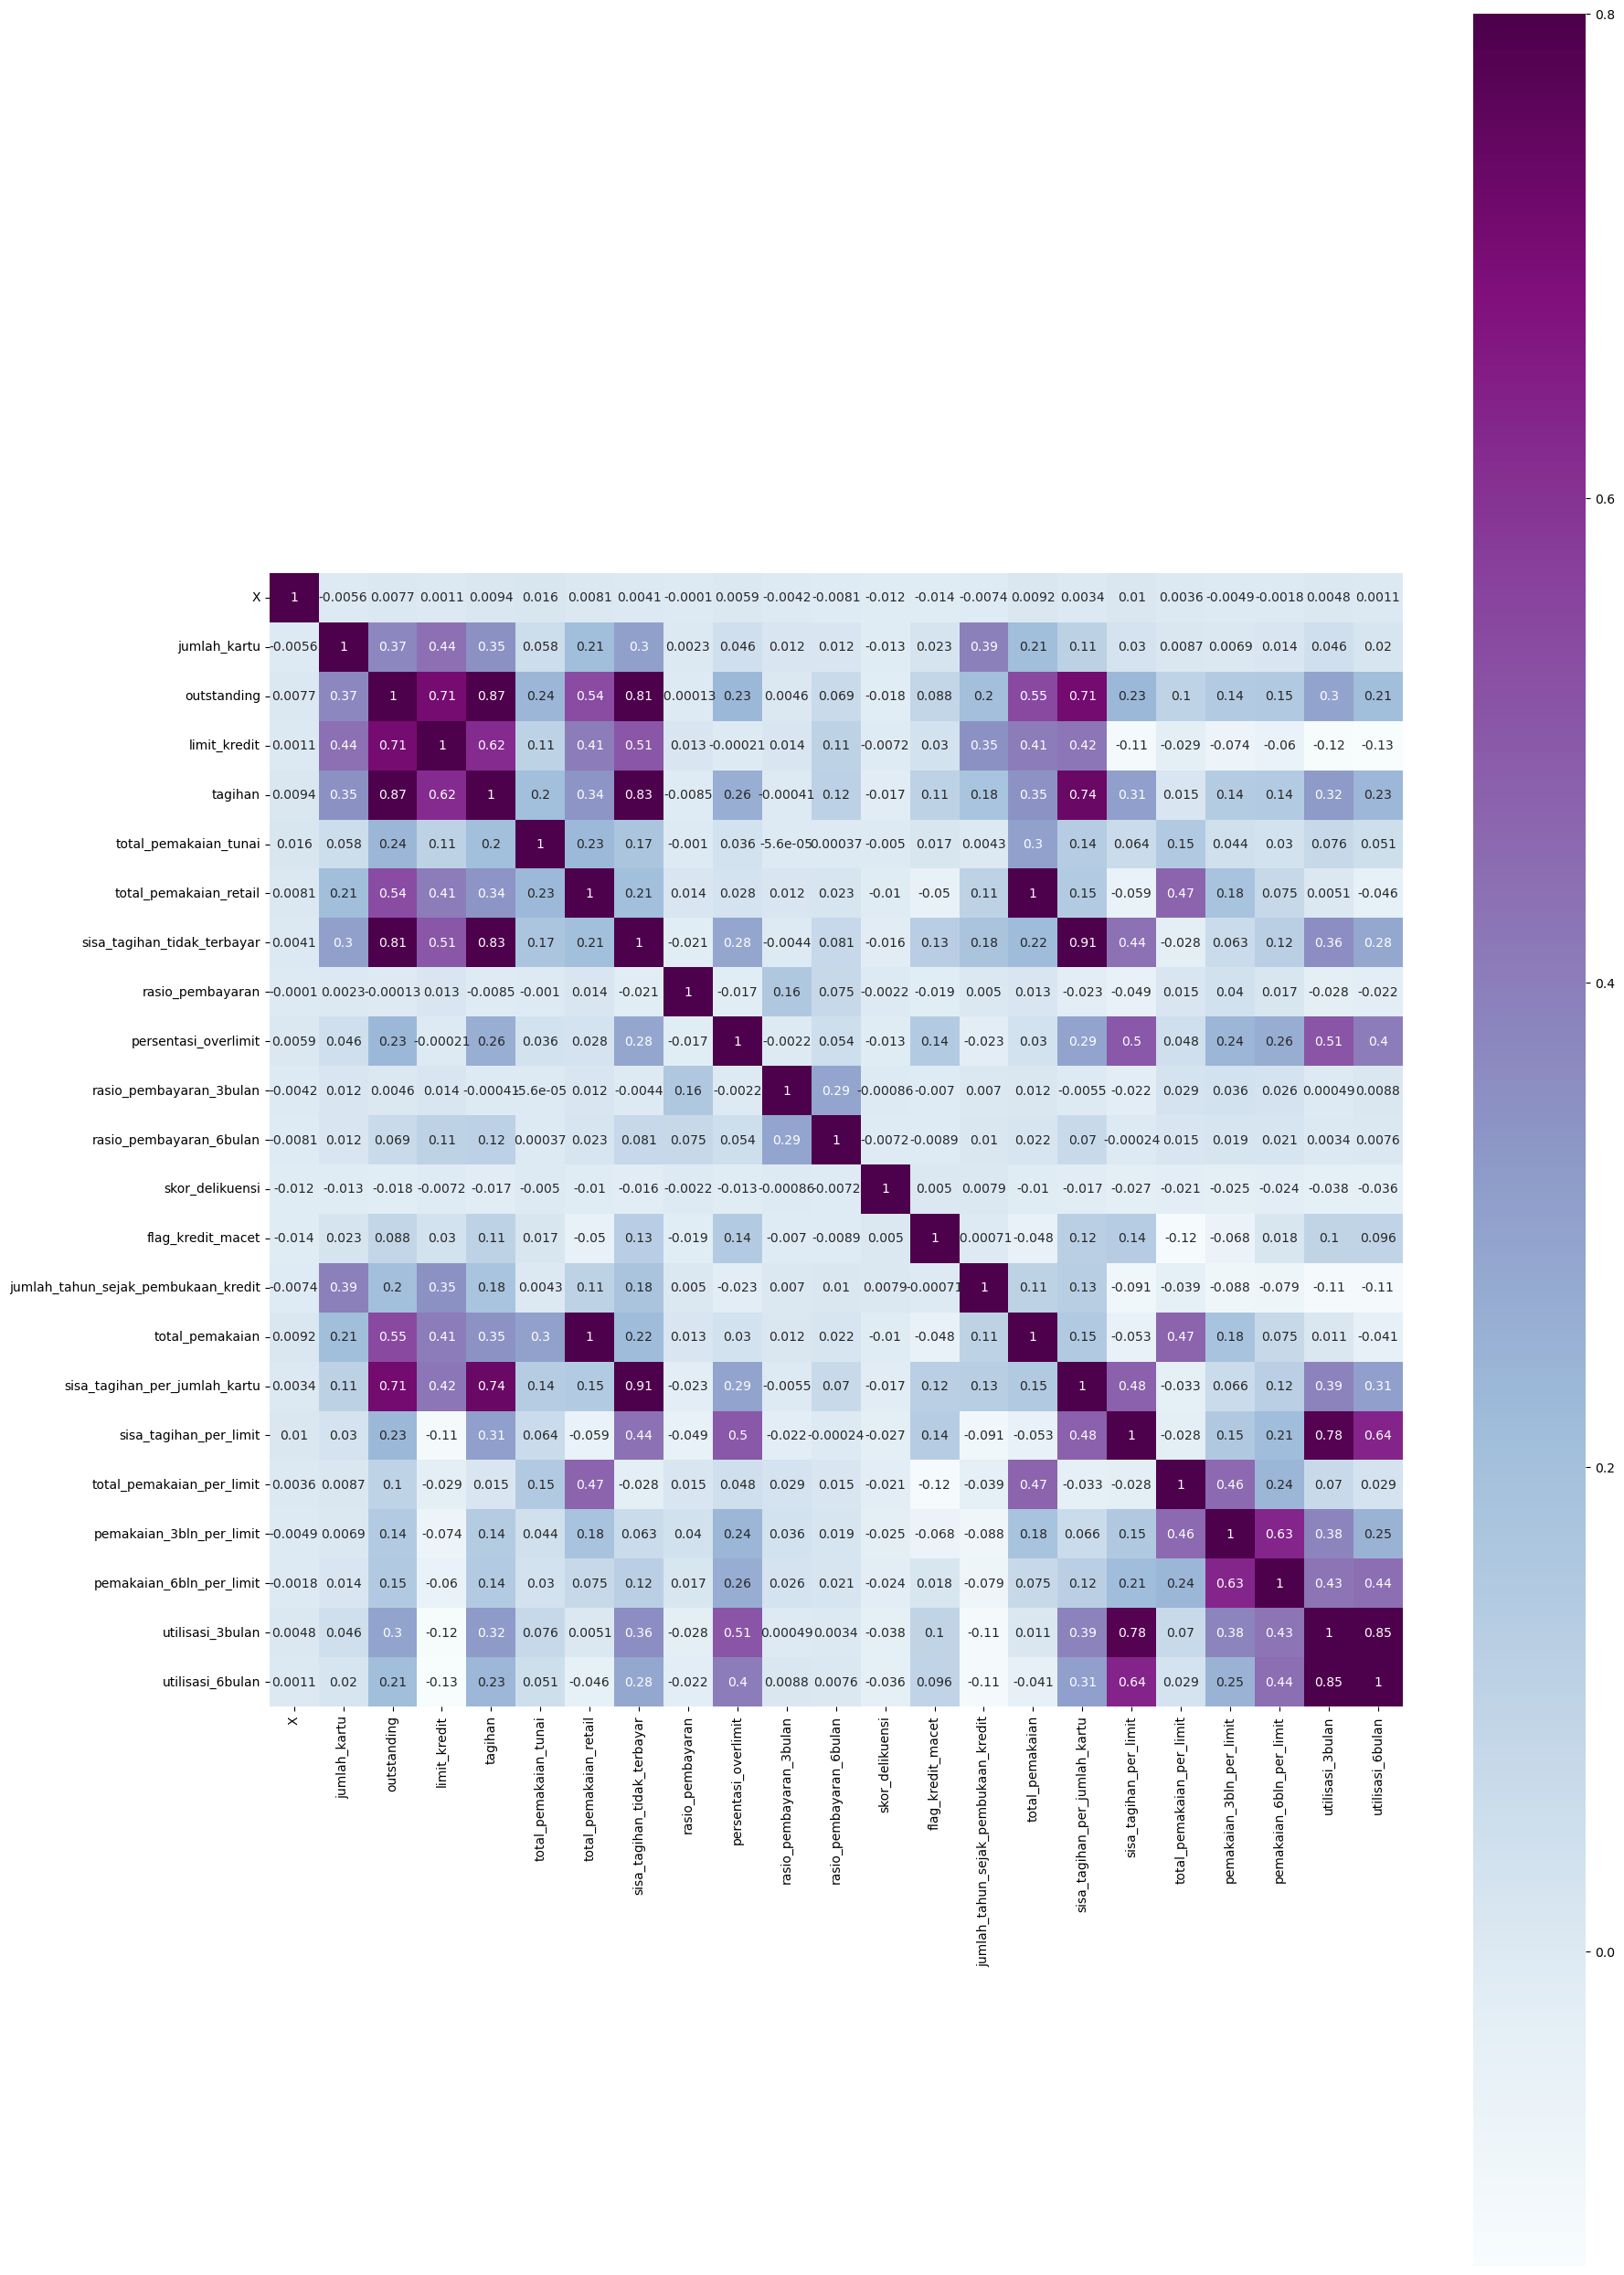

In [23]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(20, 32))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

Heatmap tersebut menjelaskan hubungan antar kolom

### Boxplot kredit_macet dengan jumlah_kartu, outstanding, limit_kredit, dan tagihan

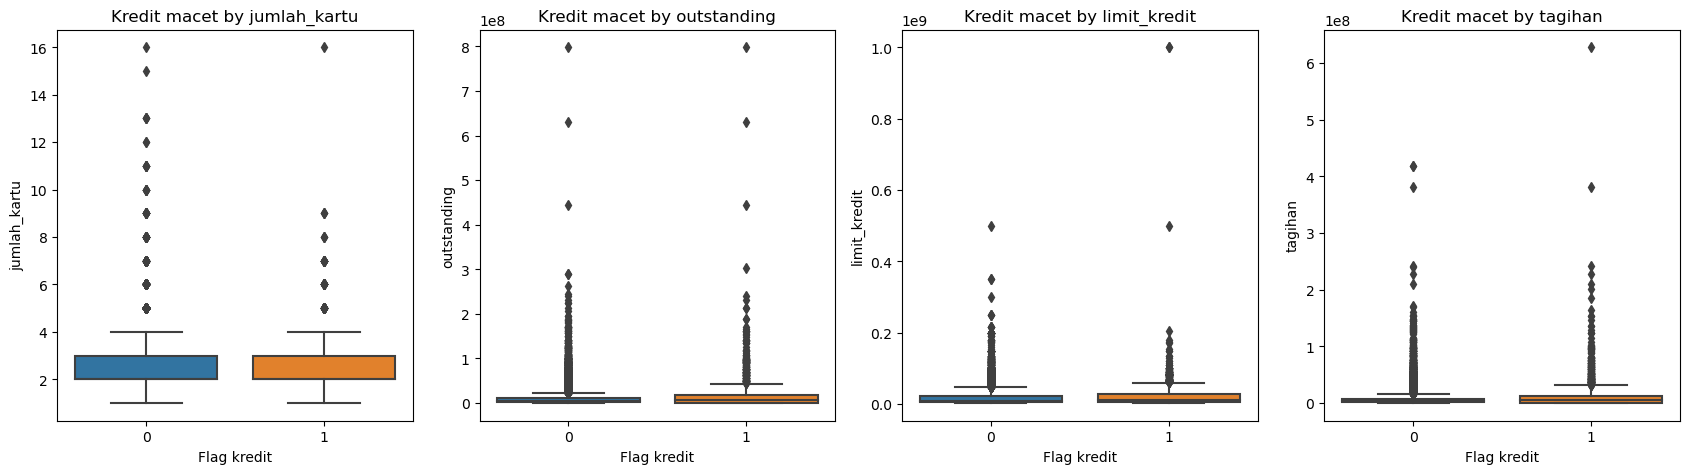

In [24]:
numeric_columns = ['jumlah_kartu','outstanding', 'limit_kredit', 'tagihan']

fig, axes = plt.subplots(1, len(numeric_columns), figsize=(17, 5))
for idx, cat_col in enumerate(numeric_columns):
    sns.boxplot(y=cat_col, data=train, x='flag_kredit_macet', ax=axes[idx])
    axes[idx].set_title(f'Kredit macet by {cat_col}')
    axes[idx].set_xlabel('Flag kredit')
    axes[idx].set_ylabel(cat_col)

plt.tight_layout()
plt.show()


Pada plot tersebut dapat dilihat terdapat banyak outlier.

### Pairplot

Melihat hubungan jumlah kartu, outstanding, limit kredit, tagihan dengan flag kredit macet

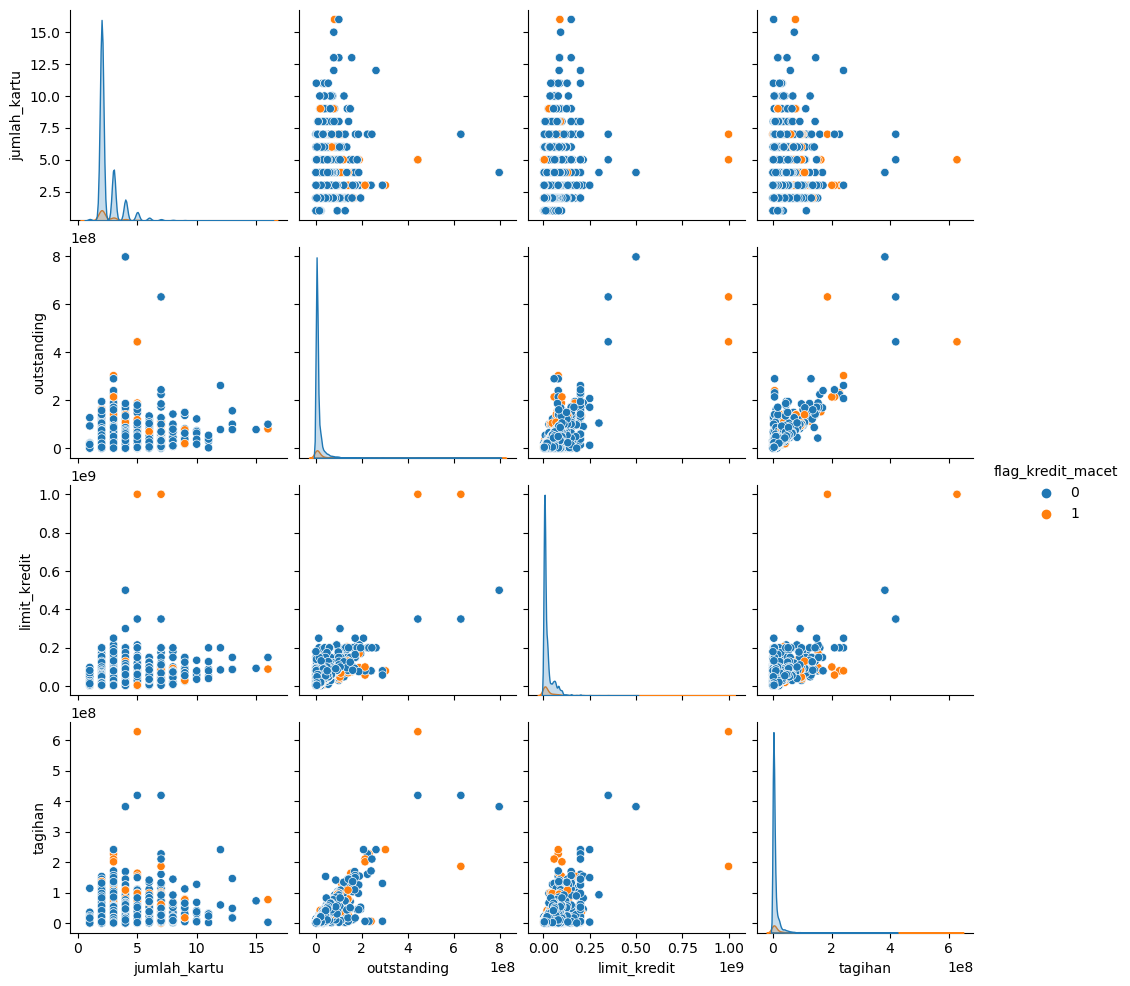

In [25]:
df_pair = train[['jumlah_kartu','outstanding', 'limit_kredit', 'tagihan', 'flag_kredit_macet']]
sns.pairplot(df_pair, hue="flag_kredit_macet")

Melihat hubungan total pemakaian, rasio pembayaran, presentasi overlimit, skor delikuensi, sisa tagihan tidak dibayar dengan flag kredit macet

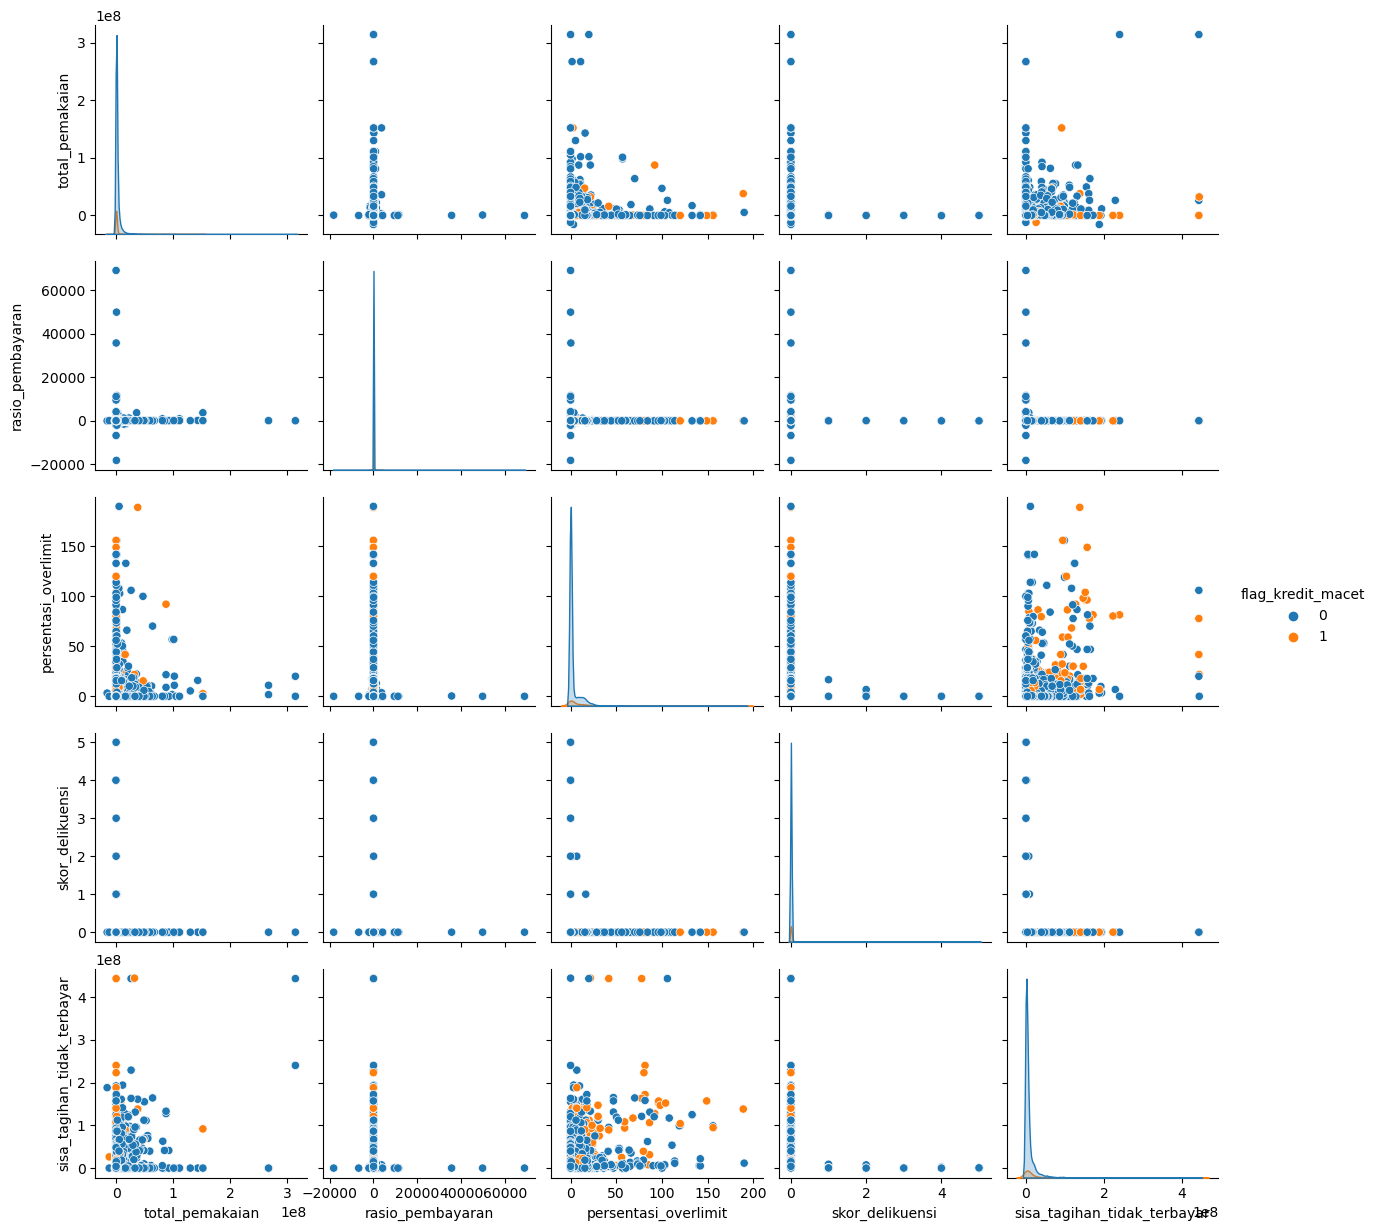

In [26]:
df_pair = train[['flag_kredit_macet','total_pemakaian', 'rasio_pembayaran', 'persentasi_overlimit', 'skor_delikuensi', 'sisa_tagihan_tidak_terbayar']]
sns.pairplot(df_pair, hue="flag_kredit_macet")

### Heatmap dari tabel silang - flag_kredit_macet berdasarkan kode_cabang

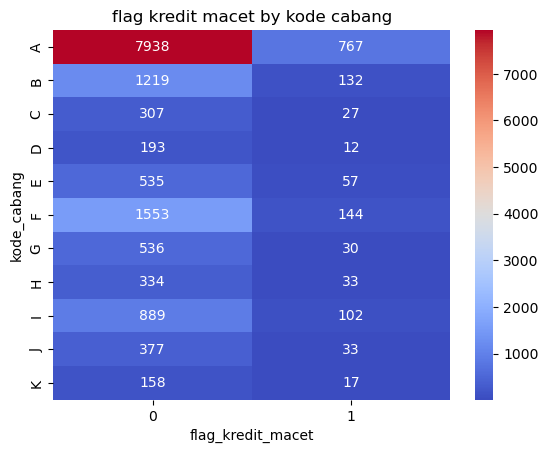

In [27]:
# Membuat heatmap dari tabel silang
crosstab_result = pd.crosstab(train['kode_cabang'], train['flag_kredit_macet'])
sns.heatmap(crosstab_result, annot=True, cmap='coolwarm', fmt='d')
plt.title('flag kredit macet by kode cabang')
plt.show()

## Training - Testing

Melihat hasil training - testing sebelum praproses dilakukan

In [28]:
# pip install xgboost

Sebelum training - testing lakukan encoding untuk target agar hasilnya antara 0 dan 1, pisahkan kolom target dari fitur (target dtampung dalam y, sedangkan train tanpa target ditampung dalam X), onehot data X untuk data kategori, terakhir membagi data train dan test

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# encoding
label_encoder = LabelEncoder()
train['flag_kredit_macet'] = label_encoder.fit_transform(train['flag_kredit_macet'])
list(label_encoder.classes_)

# Pisahkan kolom target (label) dari fitur
X = train.drop('flag_kredit_macet', axis=1) 
y = train[['flag_kredit_macet']]

# onehot
X = pd.get_dummies(X)

# membagi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Melakukan training - testing dengan XGBoost

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
xgb_model = XGBClassifier(n_estimators=40,max_depth=27, gamma=0.6)
xgb_model.fit(X_train,y_train)
pred_xgb=xgb_model.predict(X_test)
score_xgb = accuracy_score(pred_xgb,y_test)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_test, pred_xgb))

Akurasi :  90.9970958373669
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2821
           1       0.49      0.14      0.22       278

    accuracy                           0.91      3099
   macro avg       0.71      0.56      0.59      3099
weighted avg       0.88      0.91      0.89      3099



Hasil training - testing 90,99%

## Praproses

Melakukan Praproses data untuk melihat pengaruhnya terhadap hasil training - testing

### Missing Value Imputation

Menghilangkan nilai NULL

In [31]:
train.isna().sum()

X                                        0
jumlah_kartu                             0
outstanding                              0
limit_kredit                             0
tagihan                                  0
total_pemakaian_tunai                    0
total_pemakaian_retail                   0
sisa_tagihan_tidak_terbayar              0
kode_cabang                            100
rasio_pembayaran                         0
persentasi_overlimit                     0
rasio_pembayaran_3bulan                  0
rasio_pembayaran_6bulan                  0
skor_delikuensi                          0
flag_kredit_macet                        0
jumlah_tahun_sejak_pembukaan_kredit      0
total_pemakaian                          0
sisa_tagihan_per_jumlah_kartu            0
sisa_tagihan_per_limit                   0
total_pemakaian_per_limit                0
pemakaian_3bln_per_limit                 0
pemakaian_6bln_per_limit                 0
utilisasi_3bulan                         0
utilisasi_6

Menangani nilai yang hilang pada kode_cabang dengan modus

In [32]:
train["kode_cabang"].fillna(train["kode_cabang"].mode()[0],inplace=True)

In [33]:
train.isna().sum()

X                                      0
jumlah_kartu                           0
outstanding                            0
limit_kredit                           0
tagihan                                0
total_pemakaian_tunai                  0
total_pemakaian_retail                 0
sisa_tagihan_tidak_terbayar            0
kode_cabang                            0
rasio_pembayaran                       0
persentasi_overlimit                   0
rasio_pembayaran_3bulan                0
rasio_pembayaran_6bulan                0
skor_delikuensi                        0
flag_kredit_macet                      0
jumlah_tahun_sejak_pembukaan_kredit    0
total_pemakaian                        0
sisa_tagihan_per_jumlah_kartu          0
sisa_tagihan_per_limit                 0
total_pemakaian_per_limit              0
pemakaian_3bln_per_limit               0
pemakaian_6bln_per_limit               0
utilisasi_3bulan                       0
utilisasi_6bulan                       0
dtype: int64

Sudah tidak ada data dengan nilai NULL

Mendrop X karena dirasa tidak berpengaruh terhadap training

In [34]:
train = train.drop('X', axis=1)

## Training - Testing

Kembali melakukan training - testing untuk melihat perbedaan antara sebelum praproses dan setelah praproses

Seperti sebelumnya, lakukan encoding, pisahkan kolom target, onehot lalu bagi data train dan data test

In [35]:
# encoding
label_encoder = LabelEncoder()
train['flag_kredit_macet'] = label_encoder.fit_transform(train['flag_kredit_macet'])
list(label_encoder.classes_)

# Pisahkan kolom target (label) dari fitur
X = train.drop('flag_kredit_macet', axis=1) 
y = train[['flag_kredit_macet']]

# onehot
X = pd.get_dummies(X)

# membagi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Mengecek apakah kolom 'X' sudah ter drop

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12394 entries, 10621 to 13349
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   jumlah_kartu                         12394 non-null  int64  
 1   outstanding                          12394 non-null  int64  
 2   limit_kredit                         12394 non-null  float64
 3   tagihan                              12394 non-null  float64
 4   total_pemakaian_tunai                12394 non-null  float64
 5   total_pemakaian_retail               12394 non-null  float64
 6   sisa_tagihan_tidak_terbayar          12394 non-null  float64
 7   rasio_pembayaran                     12394 non-null  float64
 8   persentasi_overlimit                 12394 non-null  float64
 9   rasio_pembayaran_3bulan              12394 non-null  float64
 10  rasio_pembayaran_6bulan              12394 non-null  float64
 11  skor_delikuensi         

Lakukan training - testing dengan XGBoost kembali

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
xgb_model = XGBClassifier(n_estimators=40,max_depth=27, gamma=0.6)
xgb_model.fit(X_train,y_train)
pred_xgb=xgb_model.predict(X_test)
score_xgb = accuracy_score(pred_xgb,y_test)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_test, pred_xgb))

Akurasi :  90.57760567925138
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2821
           1       0.43      0.15      0.22       278

    accuracy                           0.91      3099
   macro avg       0.67      0.57      0.59      3099
weighted avg       0.88      0.91      0.88      3099



Hasil training - testing adalah 90,57%

### Mengembalikan nilai train

Dikarenakan hasil training - testing sebelum praproses lebih besar dari setelah praproses maka train dikembalikan ke kondisi semula saat sebelum praproses

In [38]:
train = train_original

### Penanganan data Imbalance

Akan dilakukan metode resampling untuk menaikan jumlah data minoritas menggunakan RandomOverSampler karena terdapat ketimpangan antara dana y_train dengan X_train

Sebelum resempling, karena sebelumnya train diubah maka lakukan lagi pemisahan data train dan test

In [39]:
# encoding
label_encoder = LabelEncoder()
train['flag_kredit_macet'] = label_encoder.fit_transform(train['flag_kredit_macet'])
list(label_encoder.classes_)

# Pisahkan kolom target (label) dari fitur
X = train.drop('flag_kredit_macet', axis=1) 
y = train[['flag_kredit_macet']]

# onehot
X = pd.get_dummies(X)

# membagi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
#pip install imbalanced-learn

Melihat jumlah baris kolom X dan y sebelum resampling

In [41]:
print(y_train.shape)
print(X_train.shape)

(12394, 1)
(12394, 33)


Melihat distribusi penyebaran 0 dan 1 di y_train

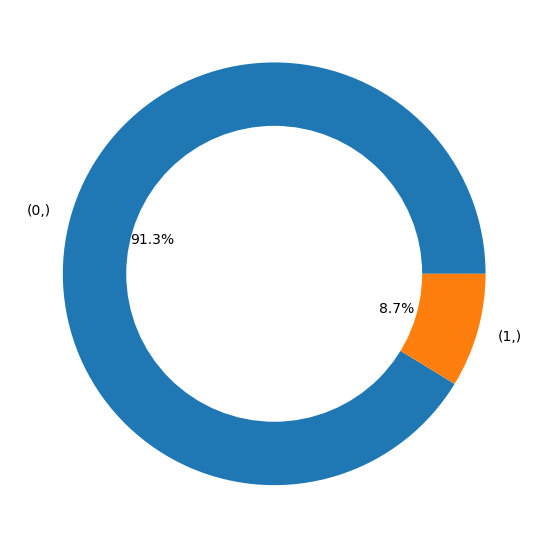

In [42]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y_train.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

Lakukan Resampling

In [43]:
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
X_train,y_train=over.fit_resample(X_train, y_train)

Melihat jumlah baris kolom X dan y setelah resampling

In [44]:
print(y_train.shape)
print(X_train.shape)

(22626, 1)
(22626, 33)


shape dari X dan y telah bertambah

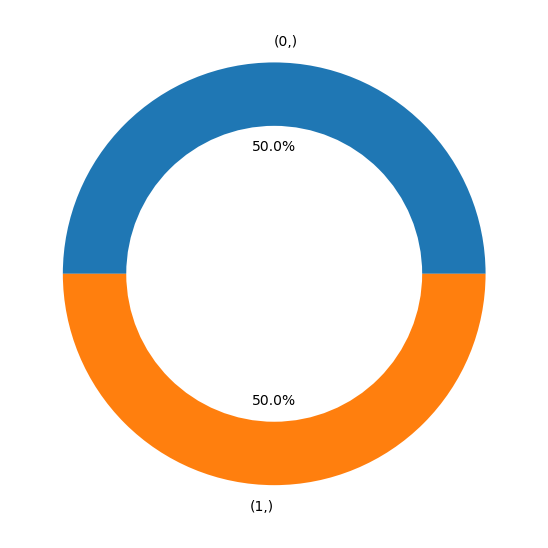

In [45]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y_train.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

Penyebaran 0 dan 1 telah sama

## Training - Testing

Melakukan training - testing setelah penanganan data imbalance enggunakan XGBoost

In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
xgb_model = XGBClassifier(n_estimators=50,max_depth=10, gamma=0.5)
xgb_model.fit(X_train,y_train)
pred_xgb=xgb_model.predict(X_test)
score_xgb = accuracy_score(pred_xgb,y_test)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_test, pred_xgb))

Akurasi :  89.64181994191675
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2821
           1       0.41      0.34      0.37       278

    accuracy                           0.90      3099
   macro avg       0.67      0.64      0.66      3099
weighted avg       0.89      0.90      0.89      3099



Hasil training - testing adalah 89%

### Training - Testing Akhir

Karena hasil training - testing setelah resampling hasilnya lebih kecil daripada sebelum resampling, maka train dikembalikan lagi seperti semula

In [47]:
train = train_original

kembali melakukan encoding, onehot dan pemisahan train dan test

In [48]:
# encoding
label_encoder = LabelEncoder()
train['flag_kredit_macet'] = label_encoder.fit_transform(train['flag_kredit_macet'])
list(label_encoder.classes_)

# Pisahkan kolom target (label) dari fitur
X = train.drop('flag_kredit_macet', axis=1) 
y = train[['flag_kredit_macet']]

# onehot
X = pd.get_dummies(X)

# membagi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Melakukan training - testing

Dengan XGboost dan Random Forest, juga melakukan perubahan HyperParameter untuk meningkatkan akurasi

### XGBoost

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
xgb_model = XGBClassifier(n_estimators=70,max_depth=10, gamma=0.6)
xgb_model.fit(X_train,y_train)
pred_xgb=xgb_model.predict(X_test)
score_xgb = accuracy_score(pred_xgb,y_test)*100
print("Akurasi : ", score_xgb)
print(classification_report(y_test, pred_xgb))

Akurasi :  91.4811229428848
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2821
           1       0.59      0.17      0.27       278

    accuracy                           0.91      3099
   macro avg       0.75      0.58      0.61      3099
weighted avg       0.89      0.91      0.89      3099



Hasil training-testing akhir adalah 91.48%

### Feature Importance

Melihat urutan 'importance' dari data train

In [50]:
feature_importances = pd.DataFrame(xgb_model.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)


                                     importance
rasio_pembayaran                       0.144462
total_pemakaian_retail                 0.081307
total_pemakaian_per_limit              0.058087
sisa_tagihan_tidak_terbayar            0.045696
persentasi_overlimit                   0.043381
rasio_pembayaran_3bulan                0.035513
tagihan                                0.031535
outstanding                            0.030928
pemakaian_3bln_per_limit               0.030158
sisa_tagihan_per_jumlah_kartu          0.030029
kode_cabang_A                          0.028193
kode_cabang_E                          0.028110
kode_cabang_F                          0.027508
rasio_pembayaran_6bulan                0.027179
kode_cabang_B                          0.026183
kode_cabang_C                          0.025731
sisa_tagihan_per_limit                 0.025107
total_pemakaian_tunai                  0.024801
limit_kredit                           0.024618
utilisasi_3bulan                       0

membuat plot dari importances

<Axes: >

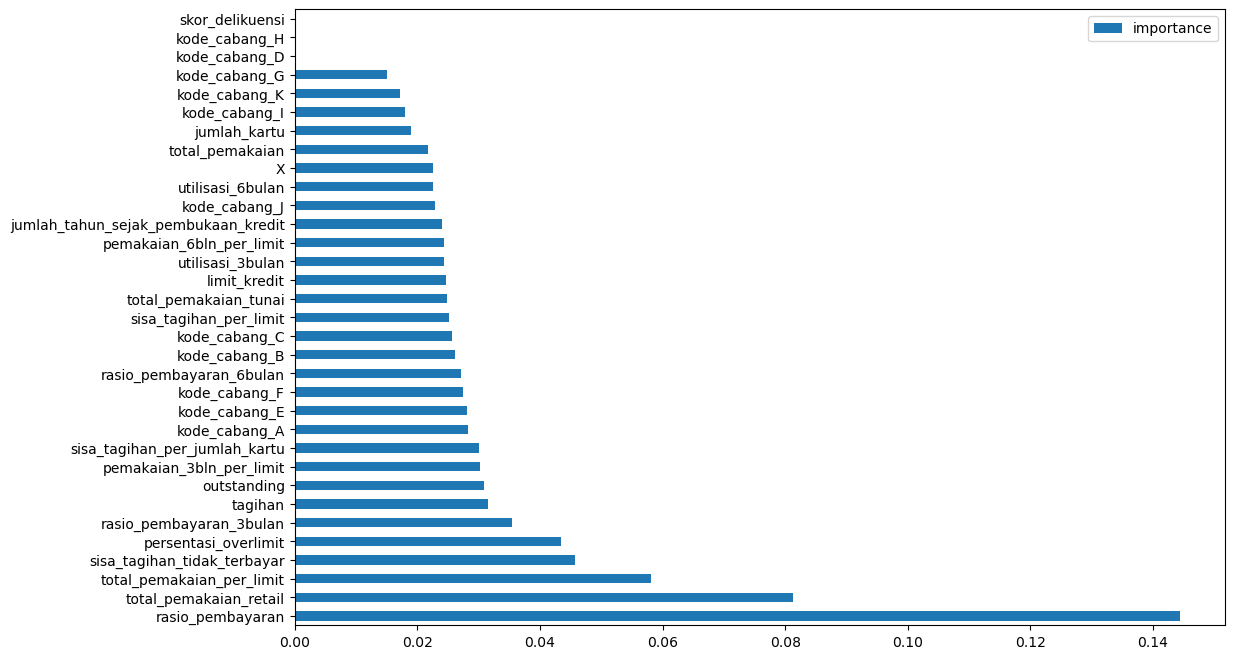

In [51]:
feature_importances.plot(kind='barh', figsize=(12, 8))

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=70,max_depth=40,n_estimators=55)
forest_model.fit(X_train,y_train)
pred_cv_forest=forest_model.predict(X_test)
score_forest = accuracy_score(pred_cv_forest,y_test)*100
print("akurasi:",score_forest)
print(classification_report(y_test, pred_cv_forest))

akurasi: 91.41658599548241
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2821
           1       0.64      0.10      0.17       278

    accuracy                           0.91      3099
   macro avg       0.78      0.55      0.56      3099
weighted avg       0.89      0.91      0.88      3099



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8444d434-c952-465d-b031-2cd7b64c6889' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>